# Predicting Medical Insurance Cost using Linear Regression Method

## Introduction

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

#### Dataset Information 

Inside the dataset, there are several attributes that can be a factor that affecting the cost of medical insurance. The attributes are: 

* **Age:** Age of primary beneficiary
* **Sex:** Sex/gender of the beneficiary 
* **BMI:** Body Mass Index (BMI) of beneficiary; providing information of body in term of relationship between height and weight of a person
* **Children:** Number of the dependents covered by medical insurance 
* **Smoker:** Status of beneficiary; smoker or non-smoker
* **Region:** Beneficiaries residential area in US; northeast, southeast, southwest, northwest.
* **Charges:** Individual medical cost billed by medical insurance

The dataset was taken from https://www.kaggle.com/mirichoi0218/insurance


## Exploratory Data Analysis

In [1]:
#import related libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
#check information about the dataset 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#produce First 5 rows.

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#produce Last 5 rows.

data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
#check for missing values in any column(s)

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#detailed description of the dataset 

data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [8]:
data.shape

(1338, 7)

## Data Visualization

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. 

### Distribution of Dependent Variable 

Text(0.5, 1.0, 'Distribution of Charges')

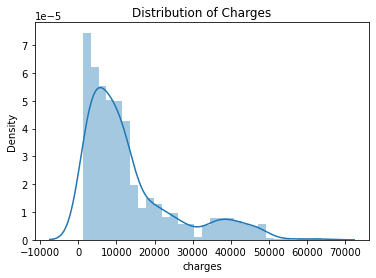

In [9]:
# Distribution of Charges

sns.distplot(data['charges'])
plt.title('Distribution of Charges')

The density plot above shows that the distribution of the charges is right-skewed. A highly-skewed data may cause in poorly fitting model. To achieve 'best fitted' model, the distribution needs to be normalize. 

Text(0.5, 1.0, 'Distribution of Charges')

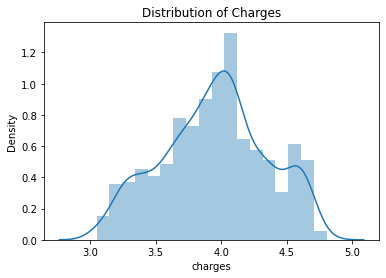

In [10]:
# Normalize Distribution of Charges using Natural Logarithm

sns.distplot(np.log10(data['charges']))
plt.title('Distribution of Charges')

### Finding Independent Variable

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. 

In [11]:
repval = {'sex':{'male':0, 'female':1},
          'region':{'southwest':1, 'southeast':2,'northwest':3,'northeast':4},
          'smoker':{'yes':1, 'no':0}
         }

In [12]:
data = data.replace(repval)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat

#### Gender against Charges

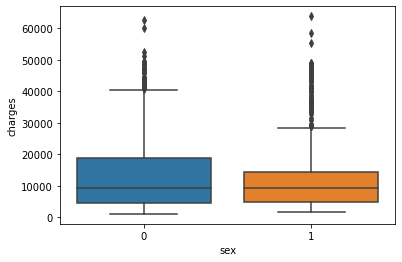

In [13]:
sns.boxplot(x = data['sex'], y = data['charges'])
plt.show()

#### No. of Children against Charges

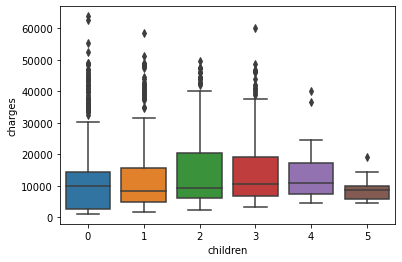

In [14]:
sns.boxplot(x = data['children'], y = data['charges'])
plt.show()

#### Smoker against Charges

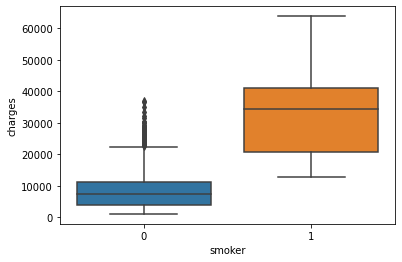

In [15]:
sns.boxplot(x = data['smoker'], y = data['charges'])
plt.show()

#### Region against Charges

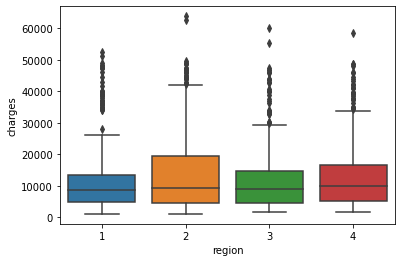

In [16]:
sns.boxplot(x = data['region'], y = data['charges'])
plt.show()

From the boxplots above, there are few insights that can be retrieved: 

1. Sex, Region, and Gender do not have much impact on medical insurance charges. 
2. Those who are smoking does impact the medical insurance charges. 
3. Those who have none and one dependent impacted less than those who have two or more dependents. However, those with five dependents show a smaller impact than others. 

From here, we can deduce that Smokers, No. of Dependent, Age, and BMI are the independent variables to predict the medical insurance cost.

### Correlation between Variables

In [17]:
data_corr = data.corr()
data_corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,0.004588,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


<AxesSubplot:>

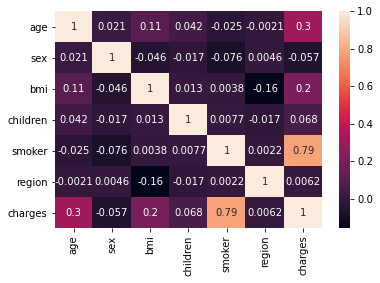

In [18]:
sns.heatmap(data_corr, annot=True)

## Building Machine Learning Model

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequa

### Features Preparation

In [39]:
#create a list of features/variables

feat_cols = ['age','smoker','children','bmi']

In [40]:
#create variable X and Y 

X = data[feat_cols]
Y = data['charges']

In [42]:
#check shapes of X and Y

X.shape, Y.shape

((1338, 4), (1338,))

### Data Split (Train-Test-Split) 

In [43]:
#import related librar(ies)

from sklearn.model_selection import train_test_split

In [44]:
#Define data split (80:20 ratio)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [53]:
#check shape before and after splitting 

print("Before split: ",X.shape,",", Y.shape)
print("After split [Train]: ",X_train.shape,",", Y_train.shape)
print("After split [Test]: ",X_test.shape,",", Y_test.shape)

Before split:  (1338, 4) , (1338,)
After split [Train]:  (1070, 4) , (1070,)
After split [Test]:  (268, 4) , (268,)


### Building Linear Regression Model 

In [54]:
#import related librar(ies)

from sklearn.linear_model import LinearRegression 
linreg = LinearRegression()

In [55]:
#train the dataset using the LR model 

linreg.fit(X_train, Y_train)

LinearRegression()

In [56]:
#apply trained model to make prediction on test set

Y_pred = linreg.predict(X_test)

In [63]:
print(linreg.intercept_)
print(linreg.coef_)
print(linreg.score(X_test,Y_test))

-11132.780520689234
[  252.86854163 23378.91123138   472.69513384   300.13146548]
0.8152329566223071


In [62]:
list(zip(feat_cols, linreg.coef_))

[('age', 252.86854162915066),
 ('smoker', 23378.911231381575),
 ('children', 472.6951338352085),
 ('bmi', 300.1314654823982)]